## Student name: **JIANG Tingyu & WU Chenyin**

## Chapitre 2
### Homework 1

pubmed_last_100k.json is a file containing metadatas from pubmed articles. Your goal is to convert the json to a mongo DB and answer the following questions USING mongodb querys:

In [324]:
import pymongo
import json

client = pymongo.MongoClient('localhost', 27017)
mydb = client["homework"]
collection = mydb["pubmed_last_100k"]


**1) Create an index, explain your choice of key.**

In [325]:
import tqdm
import pymongo

client = pymongo.MongoClient('localhost', 27017)
mydb = client["homework"]
collection = mydb["pubmed_last_100k"]

collection.find( { "pmid": 30624702 } ).explain()['executionStats']

{'executionSuccess': True,
 'nReturned': 1,
 'executionTimeMillis': 246,
 'totalKeysExamined': 0,
 'totalDocsExamined': 100000,
 'executionStages': {'stage': 'COLLSCAN',
  'filter': {'pmid': {'$eq': 30624702}},
  'nReturned': 1,
  'executionTimeMillisEstimate': 19,
  'works': 100002,
  'advanced': 1,
  'needTime': 100000,
  'needYield': 0,
  'saveState': 100,
  'restoreState': 100,
  'isEOF': 1,
  'direction': 'forward',
  'docsExamined': 100000},
 'allPlansExecution': []}

In [327]:
collection.create_index([ ("pmid",1) ], unique=True)
collection.find( { "pmid": 30624702 } ).explain()['executionStats']

{'executionSuccess': True,
 'nReturned': 1,
 'executionTimeMillis': 5,
 'totalKeysExamined': 1,
 'totalDocsExamined': 1,
 'executionStages': {'stage': 'FETCH',
  'nReturned': 1,
  'executionTimeMillisEstimate': 0,
  'works': 2,
  'advanced': 1,
  'needTime': 0,
  'needYield': 0,
  'saveState': 0,
  'restoreState': 0,
  'isEOF': 1,
  'docsExamined': 1,
  'alreadyHasObj': 0,
  'inputStage': {'stage': 'IXSCAN',
   'nReturned': 1,
   'executionTimeMillisEstimate': 0,
   'works': 2,
   'advanced': 1,
   'needTime': 0,
   'needYield': 0,
   'saveState': 0,
   'restoreState': 0,
   'isEOF': 1,
   'keyPattern': {'pmid': 1},
   'indexName': 'pmid_1',
   'isMultiKey': False,
   'multiKeyPaths': {'pmid': []},
   'isUnique': True,
   'isSparse': False,
   'isPartial': False,
   'indexVersion': 2,
   'direction': 'forward',
   'indexBounds': {'pmid': ['[30624702, 30624702]']},
   'keysExamined': 1,
   'seeks': 1,
   'dupsTested': 0,
   'dupsDropped': 0}},
 'allPlansExecution': []}

We chose the key "pmid" to create my index due to the unique valuethis of this key contains for each document. It helps us to speed up the query.

**2) Delete every paper that was published prior 2019**

In [328]:
query = {"date":{'$regex':'^year 201[^9]', '$options': 'i' }}
collection.count_documents(query)

4

In [330]:
collection.delete_many(query)

As remainder, we've checked that four paper with "date" earlier than 2019 are deleted successfully after our operation.

**3) How many paper have a single author ? Two authors ?**

In [331]:
collection.count_documents({ "team_size": 1 })

4418

In [332]:
collection.count_documents({ "team_size": 2 })

8942

There are 4418 paper with a single author and 8942 paper with two authors.

**4) What's the last paper inserted in the db ?**

In [ ]:
import tqdm
import pymongo

client = pymongo.MongoClient('localhost', 27017)
mydb = client["homework"]
collection = mydb["pubmed_last_100k"]

docs = collection.find({}).sort([('_id',-1)]).limit(1)
print([doc['pmid'] for doc in docs])

The Pmid of the last paper inserted is 32289911.

**5) Find articles with null meshwords.**

In [333]:
query = {"meshwords":{'$type' : 'null'}}
collection.count_documents(query)

50806

In [334]:
docs = collection.find(query)
print([doc['pmid'] for doc in docs])

[30618194, 30620089, 30625514, 30635026, 30638571, 30642391, 30644172, 30645024, 30646842, 30646862, 30647291, 30650221, 30651124, 30651977, 30652362, 30652435, 30652437, 30654755, 30654811, 30655207, 30840780, 30840783, 30657187, 31044219, 30841486, 30841487, 30659891, 30841492, 30659937, 31044228, 30841496, 31044232, 31044235, 30841500, 30841502, 30841506, 31044245, 30841509, 30841514, 31249286, 31044271, 31249295, 31044275, 30661975, 31044288, 31249330, 30841530, 30663584, 31249354, 30841541, 30663843, 30664293, 30841546, 30664333, 30841551, 31044338, 30665364, 30665383, 30665468, 31044371, 31044372, 30841563, 30841566, 30841569, 31044401, 30841570, 31044403, 31044404, 31044406, 30667054, 30841580, 30841585, 30841591, 30841594, 31044457, 30841597, 30841602, 31044467, 30841607, 31044470, 30841608, 30841609, 30841610, 30669462, 30841614, 30841621, 31044498, 30669631, 30841625, 30670056, 30841630, 31249523, 31044533, 30841633, 31249524, 31249529, 31249530, 30672028, 30672077, 30672103,

There are 50806 paper with null meshwords, their pmid is listed below.

**6) Choose a keyword you are interested in (machine learning, computer vision,...). Find the number of articles with the choosen keyword in their meshwords, abstract or title.**


In [335]:
query = {"$or":[{"meshwords":{'$regex':'machine learning', '$options': 'i'}},
                {"abstract":{'$regex':'machine learning', '$options': 'i'}},
                {"title":{'$regex':'machine learning', '$options': 'i'}}]}
collection.count_documents(query)

641

There are 641 articles with the choosen keyword in their meshwords, abstract or title.

**7) What's the number of articles that have atleast one affiliation AND meshwords.**

In [340]:
import tqdm
import pymongo

client = pymongo.MongoClient('localhost', 27017)
mydb = client["homework"]
collection = mydb["pubmed_last_100k"]

query = {"$and":[{"share_aff_captured": {'$gte': 1}},
                 {"meshwords":{'$type' : 'string'}}]}
collection.count_documents(query)

44187

There are 44187 articles that have at least one affiliation and meshwords.

**8) How many articles have a publishing date after 2020 ?**

In [341]:
query = {"date":{'$regex':'^year 202[^0]', '$options': 'i' }}
collection.count_documents(query)

5145

There are 5145 articles with a publishing date after 2020.

**9) Find articles where there's atleast one affiliation from a choosen country (you decide which one).**

In [342]:
query = {"$and":[{"share_aff_captured": {'$gte': 1}},
                 {"country_list":{'$regex':'^Malta', '$options': 'i' }}]}
collection.count_documents(query)

6

In [343]:
docs = collection.find(query)
print([doc['pmid'] for doc in docs])

[31657182, 31253563, 30867001, 30885570, 30826296, 33094529]


There are 6 paper with at least one affiliation from Malta, their pmid is listed below.

**10) Check for any duplicates. (hint: look at the doi)**

In [344]:
docs = collection.aggregate([{ "$group": { '_id' : '$doi', 'count': { "$sum" : 1 }}},
                             { "$match": { 'count': { "$gt" : 1}}}])
print([doc['_id'] for doc in docs])
# There are 2 duplicates in terms of the key "doi".

['10.1194/jlr.RA120001141', '10.1194/jlr.RA120000704']


**11) Remove every articles where the abstract starts with an "R".**

In [345]:
import tqdm
import pymongo

client = pymongo.MongoClient('localhost', 27017)
mydb = client["homework"]
collection = mydb["pubmed_last_100k"]

query = {"abstract":{'$regex':'^ "R'}}
collection.count_documents(query)

1927

In [346]:
collection.delete_many(query)

There are 1927 articles where the abstract start with an "R" have been removed successfully.

**12) Select papers where number of authors = number of affilations.**

In [347]:
query1 = {"$and":[{"team_size": 0},
                 {"share_aff_captured": 0}]}
doc1=collection.find(query1)

query2 = {"$and":[{"team_size": 1},
                 {"share_aff_captured": 1}]}
doc2=collection.find(query2)

print([doc1['pmid'] for doc1 in doc1])
print([doc2['pmid'] for doc2 in doc2])

[30618518, 30638571, 30641153, 30661066, 30663584, 30672736, 31044571, 30843585, 30689928, 31047014, 31047015, 31047025, 31655716, 31655720, 31655723, 31655725, 31655785, 31655786, 31655787, 31655788, 31047621, 31858967, 30693311, 31858991, 32067882, 32067883, 30696561, 30698720, 32067936, 31453641, 31047872, 31859135, 30846119, 30702772, 30846128, 30846130, 31859218, 31859219, 31859220, 31859360, 31454405, 31859428, 31454406, 32681725, 32479784, 32681856, 32479829, 32479858, 31251931, 32883422, 32883423, 32883424, 32883441, 32883442, 32883443, 32883444, 32883445, 32883446, 32276248, 31657728, 30722952, 31860809, 31860811, 31860814, 32883579, 31860824, 32883581, 32883582, 31860829, 31860830, 31860831, 30726829, 30852568, 32883620, 32883621, 32883622, 32069572, 32069580, 30730045, 32069658, 31658391, 31050494, 31050496, 33086139, 31050523, 30735407, 30735424, 32682355, 32682356, 32682357, 32682358, 32682359, 32682362, 32480367, 32480371, 32480380, 32276721, 32276739, 32682467, 31455693,

There are 4515 paper where team_size = share_aff_captured.

**13) Create 500 random samples of the dataset, compute a statistics that you are interested in and check how it behaves through the different samples**

In [348]:
import tqdm
import numpy as np
import pymongo

client = pymongo.MongoClient('localhost', 27017)
mydb = client["homework"]
collection = mydb["500_random_samples"]

list_of_insertion = []
for i in tqdm.tqdm(np.random.random(500)):
    post = {"id":int(i*10),
            "values":i}
    list_of_insertion.append(post)
    if i % 100 == 0:
        collection.insert_many(list_of_insertion)
        list_of_insertion = []
collection.insert_many(list_of_insertion)

100%|██████████| 500/500 [00:00<00:00, 145262.31it/s]


In [349]:
a = collection.aggregate([{'$group': {'_id': '$id', '_avg': {'$avg': '$values'}}}])
for doc in a:
    print(doc)

{'_id': 2, '_avg': 0.2564496858004806}
{'_id': 3, '_avg': 0.3466836029806698}
{'_id': 5, '_avg': 0.5423329181736777}
{'_id': 7, '_avg': 0.7492896994353586}
{'_id': 4, '_avg': 0.4540963722032534}
{'_id': 0, '_avg': 0.04518863684822479}
{'_id': 1, '_avg': 0.14555247825319684}
{'_id': 9, '_avg': 0.9525301573379293}
{'_id': 6, '_avg': 0.6505488473077774}
{'_id': 8, '_avg': 0.8480206730896759}


We've computed the average of values group by id.

**14) Sandbox exercise: think of a problematic and try to answer it.**

Problematic: since the beginning of 2020, between USA and China, which country has pulished more articles abour Coronavirus?

In [351]:

client = pymongo.MongoClient('localhost', 27017)
mydb = client["homework"]
collection = mydb["pubmed_last_100k"]

query1 = {"$or":[{"meshwords":{'$regex':'coronavirus', '$options': 'i'}},
                {"abstract":{'$regex':'coronavirus', '$options': 'i'}},
                {"title":{'$regex':'coronavirus', '$options': 'i'}}],
         "$and":[{"date":{'$regex':'^year 202[01]', '$options': 'i' }},
                 {"country_list":{'$regex':'^United States', '$options': 'i' }}]}
USA = collection.count_documents(query1)

query2 = {"$or":[{"meshwords":{'$regex':'coronavirus', '$options': 'i'}},
                {"abstract":{'$regex':'coronavirus', '$options': 'i'}},
                {"title":{'$regex':'coronavirus', '$options': 'i'}}],
         "$and":[{"date":{'$regex':'^year 202[01]', '$options': 'i' }},
                 {"country_list":{'$regex':'^China', '$options': 'i' }}]}
China = collection.count_documents(query2)
print("USA Coronavirus Articles: ", USA, 
      "China Coronavirus Articles: ", China)


USA Coronavirus Articles:  389 China Coronavirus Articles:  282


USA has published 389 and China has published 282, therefore, USA has pulished more articles abour Coronavirus.

## Chapitre 3
### Homework 4

change the database "neo4j" to the database "movie". Go to the browser and run on the browser console :play movie-graph then copy the queries on the console and run it. Congrats you just imported a brand new sample of data. Answer the following questions with cypher queries.

In [454]:
import tqdm
import py2neo
import numpy as np
import pandas as pd
import csv
import seaborn as sns

graph = Graph('http://localhost:7474',username='neo4j',password='password_tuts')
graph.delete_all()

**1) How many actors played in more than 2 movie ? Get their names and year they were born.**

In [383]:
import py2neo

graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")


query = """MATCH (actor:Person)-[:ACTED_IN]->(m:Movie)
WITH actor, count(m) AS numMovies
WHERE numMovies >= 2
RETURN numMovies, actor.name, actor.born;"""
data = graph.run(query).to_data_frame()

print("number of actors:", len(data))
print(data)

number of actors: 35
    numMovies              actor.name  actor.born
0           7            Keanu Reeves        1964
1           3      Laurence Fishburne        1961
2           3        Carrie-Anne Moss        1967
3           5            Hugo Weaving        1960
4           2         Charlize Theron        1975
5           4        Cuba Gooding Jr.        1968
6           2       Kiefer Sutherland        1966
7           2              J.T. Walsh        1943
8           3              Tom Cruise        1962
9           3             Kevin Bacon        1958
10          5          Jack Nicholson        1937
11          5                Meg Ryan        1961
12          2             Bonnie Hunt        1961
13          2         Jerry O'Connell        1974
14          2           Marshall Bell        1942
15          2            Greg Kinnear        1963
16          3              Helen Hunt        1963
17          2           Max von Sydow        1929
18          3          Robin 

**2) In how many movies did Tom hanks play ?**

In [223]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """
MATCH (tom:Person {name: "Tom Hanks"})-[:ACTED_IN]->(tomHanksMovies) 
RETURN tomHanksMovies;"""
data = graph.run(query).to_data_frame()

print("number of movies did Tom hanks play :", len(data))

number of movies did Tom hanks play : 12


**3) In average in how many movies do actors play in ?**

In [364]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (a:Person)-[:ACTED_IN]->(m:Movie)
WITH a, count(m) as movies
RETURN avg(movies) as average;"""
data = graph.run(query).to_data_frame()
print(data)

    average
0  1.686275


**4) In average how many actors are there in a movie ?**

In [367]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (a:Person)-[:ACTED_IN]->(m:Movie)
WITH m, count(a) as actors
RETURN avg(actors) as average;
"""
data = graph.run(query).to_data_frame()
print(data)

    average
0  4.526316


**5) In average how many writers is needed to write a movie ?**

In [368]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (a:Person)-[:WROTE]->(m:Movie)
WITH m, count(a) as actors
RETURN avg(actors) as average;
"""
data = graph.run(query).to_data_frame()
print(data)

   average
0     1.25


**6) What is the proportion of writers that also directed the movie ?**

In [438]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (a:Person)-[:WROTE]->(m:Movie)<-[:DIRECTED]-(a:Person)
WITH count(a) AS n_person
RETURN n_person"""

data = graph.run(query)
n_person = next(data)["n_person"]
print("number of personne_writers that also directed:", n_person)


number of personne_writers that also directed: 4


In [439]:
query = """
MATCH(person:Person)
WITH count(person) AS n_node
RETURN n_node
"""
data = graph.run(query)
n_node = next(data)["n_node"]
print("number of observation with label Person:", n_node)

number of observation with label Person: 133


In [442]:
proportion = 4/133
print("the proportion of writers that also directed the movie:", proportion)

the proportion of writers that also directed the movie: 0.03007518796992481


**7) Do an histogram of the year of release for the movies.**

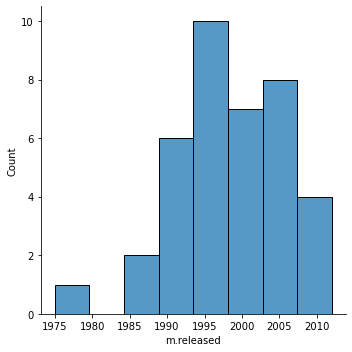

In [444]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (m:Movie) RETURN m.released"""
data = graph.run(query).to_data_frame()

sns.displot(data["m.released"])

**8) Who are the 10 actors with the most movies**

In [295]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (actor:Person)-[:ACTED_IN]->(m:Movie)
RETURN actor.name, count(m)
ORDER BY count(m) DESC
LIMIT 10;"""
data = graph.run(query).to_data_frame()

print(data)

           actor.name  count(m)
0           Tom Hanks        12
1        Keanu Reeves         7
2            Meg Ryan         5
3      Jack Nicholson         5
4        Hugo Weaving         5
5    Cuba Gooding Jr.         4
6         Kevin Bacon         3
7    Carrie-Anne Moss         3
8  Laurence Fishburne         3
9          Tom Cruise         3


**9) Delete every movie made by a director of your choosing**

In [456]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (actor:Person{name:"Rob Reiner"})-[:DIRECTED]->(m:Movie)
RETURN m"""

data = graph.run(query).to_data_frame()
print(data)

                                                   m
0  {'tagline': 'In the heart of the nation's capi...
1  {'tagline': 'For some, it's the last real tast...
2  {'tagline': 'Can two friends sleep together an...


In [459]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (actor:Person{name:"Rob Reiner"})-[:DIRECTED]->(m:Movie)
DETACH DELETE m"""

data = graph.run(query)

In [460]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (actor:Person{name:"Rob Reiner"})-[:DIRECTED]->(m:Movie)
RETURN m"""

data = graph.run(query).to_data_frame()
print(data)

Empty DataFrame
Columns: []
Index: []


we chose a director who named Rob Reiner to deleting every movie mading by him.

**10) Give some statistics that you find interesting.**

We'd like to retrieve all directors, their movies, and people who acted in the movies, returning the name of the director, the number of actors the director has worked with, and the list of actors.

In [462]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (d:Person)-[:DIRECTED]->(m:Movie)<-[:ACTED_IN]-(a:Person)
WITH d.name AS director, count(a) AS number_actors , collect(a.name) AS actors_worked_with
RETURN director, number_actors, actors_worked_with
ORDER BY number_actors DESC"""

data10 = graph.run(query).to_data_frame()

print(data10)

                director  number_actors  \
0         Lana Wachowski             24   
1        Lilly Wachowski             24   
2             Ron Howard             14   
3            Nora Ephron             12   
4          Cameron Crowe              9   
5         James Marshall              9   
6         Frank Darabont              8   
7             Tony Scott              6   
8           Mike Nichols              6   
9         Penny Marshall              6   
10          Vincent Ward              5   
11       James L. Brooks              4   
12           Scott Hicks              4   
13         Howard Deutch              4   
14         Werner Herzog              4   
15          Robert Longo              4   
16            Tom Tykwer              4   
17          Danny DeVito              4   
18           Jan de Bont              4   
19       Taylor Hackford              3   
20  John Patrick Stanley              3   
21             Tom Hanks              3   
22        C

Let’s use a summary graph to show the number of actors that the director has worked with.

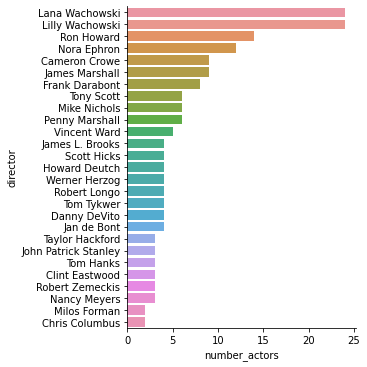

In [463]:
sns.catplot(x = 'number_actors', y='director', kind = 'bar', data = data10)

**11) Sandbox exercise: think of a problematic and try to answer it.**

We wish to find new partners for Kevin through the relationship with his partners by finding peoples who have wored with his parteners.

In [464]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (kevin:Person {name:"Kevin Bacon"})-[:ACTED_IN]->(m)<-[:ACTED_IN]->(coActors), (coActors)-[:ACTED_IN]->(m2)<-[:ACTED_IN]-(cocoActors)
WHERE NOT (kevin)-[:ACTED_IN]->(m2)
RETURN cocoActors.name AS Recommended,count(*) AS Strength
ORDER BY Strength DESC"""

data = graph.run(query).to_data_frame()
print(data)

               Recommended  Strength
0        Patricia Clarkson         3
1    Michael Clarke Duncan         3
2           James Cromwell         3
3              David Morse         3
4                Tom Hanks         3
5              Bonnie Hunt         3
6                 Meg Ryan         3
7          Rosie O'Donnell         3
8             Sam Rockwell         2
9               Helen Hunt         2
10                 Madonna         2
11              Lori Petty         2
12             Geena Davis         2
13             Gary Sinise         2
14  Philip Seymour Hoffman         2
15           Jim Broadbent         1
16            Hugo Weaving         1
17             Halle Berry         1
18            Greg Kinnear         1
19          Dave Chappelle         1
20            Parker Posey         1
21              Steve Zahn         1
22               Liv Tyler         1
23         Charlize Theron         1
24            Paul Bettany         1
25            Ian McKellen         1
2

As we have seen, the person who has the most mutual friends with Kevin Bacon is Bonnie Hunt, We will find someone who can introduce Kevin to him.

In [465]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (kevin:Person {name:"Kevin Bacon"})-[:ACTED_IN]->(m)<-[:ACTED_IN]->(coActors), (coActors)-[:ACTED_IN]->(m2)<-[:ACTED_IN]-(bonnie:Person {name:"Bonnie Hunt"})
RETURN kevin,m,coActors,m2,bonnie"""

data = graph.run(query).to_data_frame()
print(data)

                                   kevin  \
0  {'name': 'Kevin Bacon', 'born': 1958}   
1  {'name': 'Kevin Bacon', 'born': 1958}   
2  {'name': 'Kevin Bacon', 'born': 1958}   

                                                   m  \
0  {'tagline': 'Houston, we have a problem.', 'ti...   
1  {'tagline': 'Houston, we have a problem.', 'ti...   
2  {'tagline': '400 million people were waiting f...   

                                 coActors  \
0     {'name': 'Tom Hanks', 'born': 1956}   
1   {'name': 'Gary Sinise', 'born': 1955}   
2  {'name': 'Sam Rockwell', 'born': 1968}   

                                                  m2  \
0  {'tagline': 'Walk a mile you'll never forget.'...   
1  {'tagline': 'Walk a mile you'll never forget.'...   
2  {'tagline': 'Walk a mile you'll never forget.'...   

                                  bonnie  
0  {'name': 'Bonnie Hunt', 'born': 1961}  
1  {'name': 'Bonnie Hunt', 'born': 1961}  
2  {'name': 'Bonnie Hunt', 'born': 1961}  


Therefore, if Kevin wants to get some news partners by Bonnie, he could be getting touch with Cuba Gooding Jr, Tom Cruise,ect. Of course, We can do the same to his others partners.

### Homework 5

You will work on a Twitch dataset found here. The goal is to learn more about the feat&fun on Twitch. First thing to do is create the network on Neo4j. Insert the node from Twitch/FR_target and then the edges from Twitch/FR_edges.csv in neo4j. Answer the following using cypher queries

In [590]:
import pandas as pd
nodes = pd.read_csv('data/FR_target.csv', delimiter=',')
nodes.dataframe = 'FR_target.csv'
nRow, nCol = nodes.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 6551 rows and 6 columns


In [591]:
nodes.head(1)

,id,days,mature,views,partner,new_id
0,150417538,577,True,775,False,4867


In [585]:
nodes.duplicated().sum()

1

In [592]:
nodes.drop_duplicates(subset=None, keep='first', inplace=True)

In [587]:
import pandas as pd
edges = pd.read_csv('data/FR_edges.csv', delimiter=',')
edges.dataframe = 'FR_edges.csv'
nRow, nCol = edges.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 112666 rows and 2 columns


In [588]:
edges.head(1)

,from,to
0,0,6420


In [589]:
edges.duplicated().sum()

0

In order to create a database with a unique id, we deleted the duplicate data in the file before creating the database.

In [473]:
import pandas as pd
import tqdm
import py2neo
import matplotlib.pyplot as plt

characters = pd.read_csv("data/FR_target.csv")
graph = Graph('http://localhost:7474',username='neo4j',password='password_tuts')

graph.delete_all()

try:
    graph.run("CREATE CONSTRAINT ON (n:Id) ASSERT n.id IS UNIQUE")
except:
    print("Constraint already exists")
    
transaction_list = []

iteration = 0
for row in tqdm.tqdm(characters.iterrows()):
    id = row[1]["id"]
    new_id = row[1]["new_id"]
    days = row[1]["days"]
    mature = row[1]["mature"]
    views = row[1]["views"]
    partner = row[1]["partner"]
    transaction_list.append({"id":id,"new_id":new_id,"days":days,"mature":mature,"views":views,"partner":partner})
    iteration += 1
    if iteration % 1000 == 0:
        transaction = "UNWIND $json as data CREATE (n:Id) SET n = data"
        graph.run(transaction, json=transaction_list)
        transaction_list = []
        
graph.run(transaction, json=transaction_list)

6549it [00:01, 3315.78it/s]


(No data)

In [475]:
characters2comics = pd.read_csv("data/FR_edges.csv")
characters2comics = characters2comics.drop_duplicates()
transaction_list = []

transaction = """UNWIND $json as data
MATCH (a:Id),(b:Id)
WHERE a.new_id = data.from AND b.new_id = data.to
MERGE (a)-[r:Friendship]->(b)
ON CREATE
    SET r.n_collab = 1
ON MATCH
    SET r.n_collab = r.n_collab + 1
"""

it = 0   
for x in characters2comics['from']:
    x=int(x)
    y = characters2comics['to'].iloc[it]
    y=int(y)
    transaction_list.append({"from":x,"to":y})
    it +=1
    if it % 10000 == 0:
        graph.run(transaction, json=transaction_list)
        transaction_list = []

graph.run(transaction, json=transaction_list)

(No data)

**1) Give the IDs of the top 10 streamers that have atleast one collaboration.**

In [500]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (a:Id)-[r:Friendship]->(b:Id) 
RETURN a.id AS IDs, count(b) AS n_friendship
ORDER BY count(b) DESC
LIMIT 10"""
data = graph.run(query).to_data_frame()
print(data)

         IDs  n_friendship
0   28575692          1489
1   41719107          1393
2   24147592          1350
3   89872865           673
4    4102418           655
5   42141251           615
6   84934385           610
7  135468063           560
8   40063341           549
9   30709418           511


**2) Create a density of node degrees. Do you observe a power scale law ? What does it mean ?**

      degree
0         24
1          0
2          0
3          0
4          0
...      ...
6544      42
6545       2
6546      16
6547      12
6548       9

[6549 rows x 1 columns]


/Users/tia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


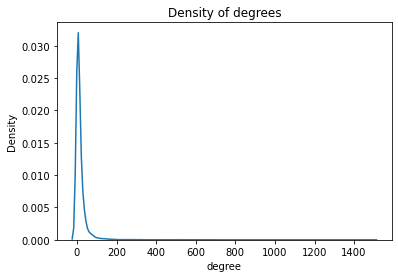

In [502]:
query =  """
MATCH (p)
WITH p, size((p)-[:Friendship]->()) as degree
RETURN degree;
"""
data = graph.run(query).to_data_frame()
print(data)
ax = sns.distplot(data["degree"],hist=False)
ax.title.set_text("Density of degrees")

Yes, we did. This means that most players actually have fewer relationships, and very few players have a large number of relationships.

**3) How many streamers has the tag "mature" ?**

In [521]:
query = """MATCH (a:Id) 
WHERE a.mature = true
RETURN count(a) AS n_tag"""
df = graph.run(query).to_data_frame()
print(df)

   n_tag
0   2414


There are 2414 streamers has the tag "mature"

**4) Is the collaboration correlated to the "mature" tag ?**

In [532]:
query = """MATCH (a:Id)-[r:Friendship]-(b:Id)
WHERE a.mature = true 
WITH a, count(r) AS n_collab
RETURN avg(n_collab)
"""
data = graph.run(query).to_data_frame()
print(data)


   avg(n_collab)
0      37.667357


In [533]:
query = """MATCH (a:Id)-[r:Friendship]-(b:Id)
WHERE a.mature = false 
WITH a, count(r) AS n_collab
RETURN avg(n_collab)
"""
data = graph.run(query).to_data_frame()
print(data)

   avg(n_collab)
0      32.503748


It seems yes, the collaboration correclated to the "mature" tag. We can see that people with mature tags have more friends on average.

**5) Do partners collaborate more than non partners ?**

In [534]:
query = """MATCH (a:Id)-[r:Friendship]-(b:Id)
WHERE a.partner = true 
WITH a, count(r) AS n_collab
RETURN avg(n_collab)
"""
data = graph.run(query).to_data_frame()
print(data)

   avg(n_collab)
0     180.919118


In [535]:
query = """MATCH (a:Id)-[r:Friendship]-(b:Id)
WHERE a.partner = false 
WITH a, count(r) AS n_collab
RETURN avg(n_collab)
"""
data = graph.run(query).to_data_frame()
print(data)

   avg(n_collab)
0      24.673017


Yes, partners collaborate more than non partner. In other words, people with more friends are more willing ro become members.

**6) Sandbox exercise: think of a problematic and try to answer it.**

We are trying to discuss the correlation between the three targets of days, mature and partner.

In [574]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="homework")

query = """MATCH (a:Id) 
WITH a.days AS duration, a.mature AS mature, a.partner AS partner
RETURN duration, mature, partner; """
data = graph.run(query).to_data_frame()
print(data)

      duration  mature  partner
0         1458   False    False
1         1061   False    False
2         2061   False    False
3         1638   False    False
4         1171    True    False
...        ...     ...      ...
6544      1856    True    False
6545       419   False    False
6546      1496    True    False
6547      2953   False    False
6548      1035   False    False

[6549 rows x 3 columns]


In [575]:
g1=data.corr()
g1.shape

(3, 3)

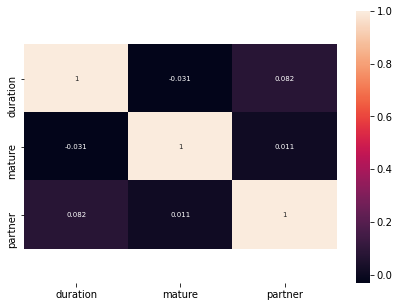

In [576]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (7, 5))
sns.heatmap(g1, annot = True, annot_kws = {'size': 7})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-.5)
plt.show()

We can see that the correlation of the three tags is not high.

# end